# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pyplot import imread
import string # Operations on Strings
import spacy # Language models

# Importing Dataset

Here we will use the reviews scraped from Amazon of HP Laptop.

In [2]:
hp_reviews = pd.read_csv("extract_reviews.csv")
hp_reviews

stars                                            comment
0     4.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    Excellent Working ...
1     4.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    Excellent Working ...
2     4.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    Laptop is light we...
3     4.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    This is a light-we...
4     4.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    Good product on th...
...                  ...                                                ...
1195  4.0 out of 5 stars  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n    \n  ...
1196  3.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    Over all a good la...
1197  3.0 out of 5 stars     \n\n\n\n\n\n\n\n  \n  \n    Nice product\n  \n
1198  5.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    A Fantastic Produc...
1199  4.0 out of 5 stars  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n    \n  ...

[1200 rows x 2 columns]

In [3]:
# Size of dataset
hp_reviews.size

2400

In [4]:
# Shape of Dataset
hp_reviews.shape

(1200, 2)

In [5]:
#Number of records in the dataset
len(hp_reviews)

1200

In [6]:
#Checking data types
hp_reviews.dtypes

stars      object
comment    object
dtype: object

# Text Preprocessing

In [7]:
#removing leading and trailing spaces
reviews = [comment.strip() for comment in hp_reviews.comment.astype('str')]
reviews

['Excellent Working this brand',
 'Excellent Working this brand',
 'Laptop is light weight and parformance is good. But bettery time is poor.',
 "This is a light-weight, good performance laptop for web browsing, document editing, and programming. UI is responsive and fast with almost zero lag. Battery backup is fine as it gives more than 3.5 hrs of screen on time.Fan runs Little bit more than usual with catchable sound, but that can be ignored. Screen quality is not that good for media consumption but is enough for web browsing, document editing, and light programming. There is no dedicated graphics so I believe it's not ideal for gaming, media editing or other graphics hungry programmes (That is not my requirement so it's fine for me). There is NO Backlit keyboard.",
 'Good product on this prize level',
 'nan',
 'Excellent Working this brand',
 'Laptop is light weight and parformance is good. But bettery time is poor.',
 "This is a light-weight, good performance laptop for web browsin

In [8]:
# removing empty strings
reviews = [x for x in reviews if x]
reviews

['Excellent Working this brand',
 'Excellent Working this brand',
 'Laptop is light weight and parformance is good. But bettery time is poor.',
 "This is a light-weight, good performance laptop for web browsing, document editing, and programming. UI is responsive and fast with almost zero lag. Battery backup is fine as it gives more than 3.5 hrs of screen on time.Fan runs Little bit more than usual with catchable sound, but that can be ignored. Screen quality is not that good for media consumption but is enough for web browsing, document editing, and light programming. There is no dedicated graphics so I believe it's not ideal for gaming, media editing or other graphics hungry programmes (That is not my requirement so it's fine for me). There is NO Backlit keyboard.",
 'Good product on this prize level',
 'nan',
 'Excellent Working this brand',
 'Laptop is light weight and parformance is good. But bettery time is poor.',
 "This is a light-weight, good performance laptop for web browsin

In [9]:
# Joining String/text
reviews_text = ' '.join(reviews)
reviews_text

'Excellent Working this brand Excellent Working this brand Laptop is light weight and parformance is good. But bettery time is poor. This is a light-weight, good performance laptop for web browsing, document editing, and programming. UI is responsive and fast with almost zero lag. Battery backup is fine as it gives more than 3.5 hrs of screen on time.Fan runs Little bit more than usual with catchable sound, but that can be ignored. Screen quality is not that good for media consumption but is enough for web browsing, document editing, and light programming. There is no dedicated graphics so I believe it\'s not ideal for gaming, media editing or other graphics hungry programmes (That is not my requirement so it\'s fine for me). There is NO Backlit keyboard. Good product on this prize level nan Excellent Working this brand Laptop is light weight and parformance is good. But bettery time is poor. This is a light-weight, good performance laptop for web browsing, document editing, and progra

In [10]:
#removing puncuations
no_punc_text = reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Excellent Working this brand Excellent Working this brand Laptop is light weight and parformance is good But bettery time is poor This is a lightweight good performance laptop for web browsing document editing and programming UI is responsive and fast with almost zero lag Battery backup is fine as it gives more than 35 hrs of screen on timeFan runs Little bit more than usual with catchable sound but that can be ignored Screen quality is not that good for media consumption but is enough for web browsing document editing and light programming There is no dedicated graphics so I believe its not ideal for gaming media editing or other graphics hungry programmes That is not my requirement so its fine for me There is NO Backlit keyboard Good product on this prize level nan Excellent Working this brand Laptop is light weight and parformance is good But bettery time is poor This is a lightweight good performance laptop for web browsing document editing and programming UI is responsive and fas

In [11]:
import nltk

In [12]:
#tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens)

['Excellent', 'Working', 'this', 'brand', 'Excellent', 'Working', 'this', 'brand', 'Laptop', 'is', 'light', 'weight', 'and', 'parformance', 'is', 'good', 'But', 'bettery', 'time', 'is', 'poor', 'This', 'is', 'a', 'lightweight', 'good', 'performance', 'laptop', 'for', 'web', 'browsing', 'document', 'editing', 'and', 'programming', 'UI', 'is', 'responsive', 'and', 'fast', 'with', 'almost', 'zero', 'lag', 'Battery', 'backup', 'is', 'fine', 'as', 'it', 'gives', 'more', 'than', '35', 'hrs', 'of', 'screen', 'on', 'timeFan', 'runs', 'Little', 'bit', 'more', 'than', 'usual', 'with', 'catchable', 'sound', 'but', 'that', 'can', 'be', 'ignored', 'Screen', 'quality', 'is', 'not', 'that', 'good', 'for', 'media', 'consumption', 'but', 'is', 'enough', 'for', 'web', 'browsing', 'document', 'editing', 'and', 'light', 'programming', 'There', 'is', 'no', 'dedicated', 'graphics', 'so', 'I', 'believe', 'its', 'not', 'ideal', 'for', 'gaming', 'media', 'editing', 'or', 'other', 'graphics', 'hungry', 'program

In [13]:
len(text_tokens)

35040

In [14]:
#Normalizing tokens by converting all of them to lower cases
lower_words = [x.lower() for x in text_tokens]
print(lower_words[:100])

['excellent', 'working', 'this', 'brand', 'excellent', 'working', 'this', 'brand', 'laptop', 'is', 'light', 'weight', 'and', 'parformance', 'is', 'good', 'but', 'bettery', 'time', 'is', 'poor', 'this', 'is', 'a', 'lightweight', 'good', 'performance', 'laptop', 'for', 'web', 'browsing', 'document', 'editing', 'and', 'programming', 'ui', 'is', 'responsive', 'and', 'fast', 'with', 'almost', 'zero', 'lag', 'battery', 'backup', 'is', 'fine', 'as', 'it', 'gives', 'more', 'than', '35', 'hrs', 'of', 'screen', 'on', 'timefan', 'runs', 'little', 'bit', 'more', 'than', 'usual', 'with', 'catchable', 'sound', 'but', 'that', 'can', 'be', 'ignored', 'screen', 'quality', 'is', 'not', 'that', 'good', 'for', 'media', 'consumption', 'but', 'is', 'enough', 'for', 'web', 'browsing', 'document', 'editing', 'and', 'light', 'programming', 'there', 'is', 'no', 'dedicated', 'graphics', 'so', 'i']


In [15]:
#importing stopwords
from nltk.corpus import stopwords
my_stop_words = stopwords.words('english')
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [16]:
#removing stopwords
no_stop_tokens = [word for word in lower_words if not word in my_stop_words]
print(no_stop_tokens[:100])

['excellent', 'working', 'brand', 'excellent', 'working', 'brand', 'laptop', 'light', 'weight', 'parformance', 'good', 'bettery', 'time', 'poor', 'lightweight', 'good', 'performance', 'laptop', 'web', 'browsing', 'document', 'editing', 'programming', 'ui', 'responsive', 'fast', 'almost', 'zero', 'lag', 'battery', 'backup', 'fine', 'gives', '35', 'hrs', 'screen', 'timefan', 'runs', 'little', 'bit', 'usual', 'catchable', 'sound', 'ignored', 'screen', 'quality', 'good', 'media', 'consumption', 'enough', 'web', 'browsing', 'document', 'editing', 'light', 'programming', 'dedicated', 'graphics', 'believe', 'ideal', 'gaming', 'media', 'editing', 'graphics', 'hungry', 'programmes', 'requirement', 'fine', 'backlit', 'keyboard', 'good', 'product', 'prize', 'level', 'nan', 'excellent', 'working', 'brand', 'laptop', 'light', 'weight', 'parformance', 'good', 'bettery', 'time', 'poor', 'lightweight', 'good', 'performance', 'laptop', 'web', 'browsing', 'document', 'editing', 'programming', 'ui', 'res

In [17]:
len(no_stop_tokens)

19440

In [18]:
pd.Series(no_stop_tokens).value_counts()

good           960
media          480
graphics       360
performance    360
product        360
              ... 
programmes     120
hungry         120
gaming         120
ideal          120
used           120
Length: 125, dtype: int64

In [19]:
pd.Series(no_stop_tokens).value_counts()[:10]

good           960
media          480
graphics       360
performance    360
product        360
light          360
laptop         360
editing        360
quality        240
keyboard       240
dtype: int64

In [20]:
clean_reviews = ' '.join(no_stop_tokens)
print(clean_reviews)

excellent working brand excellent working brand laptop light weight parformance good bettery time poor lightweight good performance laptop web browsing document editing programming ui responsive fast almost zero lag battery backup fine gives 35 hrs screen timefan runs little bit usual catchable sound ignored screen quality good media consumption enough web browsing document editing light programming dedicated graphics believe ideal gaming media editing graphics hungry programmes requirement fine backlit keyboard good product prize level nan excellent working brand laptop light weight parformance good bettery time poor lightweight good performance laptop web browsing document editing programming ui responsive fast almost zero lag battery backup fine gives 35 hrs screen timefan runs little bit usual catchable sound ignored screen quality good media consumption enough web browsing document editing light programming dedicated graphics believe ideal gaming media editing graphics hungry prog

# Stemming

In [21]:
from nltk.stem import PorterStemmer

In [22]:
ps = PorterStemmer()

In [23]:
stemmed_tokens = [ps.stem(word) for word in no_stop_tokens]
print(stemmed_tokens[:100])

['excel', 'work', 'brand', 'excel', 'work', 'brand', 'laptop', 'light', 'weight', 'parform', 'good', 'betteri', 'time', 'poor', 'lightweight', 'good', 'perform', 'laptop', 'web', 'brows', 'document', 'edit', 'program', 'ui', 'respons', 'fast', 'almost', 'zero', 'lag', 'batteri', 'backup', 'fine', 'give', '35', 'hr', 'screen', 'timefan', 'run', 'littl', 'bit', 'usual', 'catchabl', 'sound', 'ignor', 'screen', 'qualiti', 'good', 'media', 'consumpt', 'enough', 'web', 'brows', 'document', 'edit', 'light', 'program', 'dedic', 'graphic', 'believ', 'ideal', 'game', 'media', 'edit', 'graphic', 'hungri', 'programm', 'requir', 'fine', 'backlit', 'keyboard', 'good', 'product', 'prize', 'level', 'nan', 'excel', 'work', 'brand', 'laptop', 'light', 'weight', 'parform', 'good', 'betteri', 'time', 'poor', 'lightweight', 'good', 'perform', 'laptop', 'web', 'brows', 'document', 'edit', 'program', 'ui', 'respons', 'fast', 'almost', 'zero']


In [24]:
for w in no_stop_tokens:
    print(w,':',ps.stem(w))

excellent : excel
working : work
brand : brand
excellent : excel
working : work
brand : brand
laptop : laptop
light : light
weight : weight
parformance : parform
good : good
bettery : betteri
time : time
poor : poor
lightweight : lightweight
good : good
performance : perform
laptop : laptop
web : web
browsing : brows
document : document
editing : edit
programming : program
ui : ui
responsive : respons
fast : fast
almost : almost
zero : zero
lag : lag
battery : batteri
backup : backup
fine : fine
gives : give
35 : 35
hrs : hr
screen : screen
timefan : timefan
runs : run
little : littl
bit : bit
usual : usual
catchable : catchabl
sound : sound
ignored : ignor
screen : screen
quality : qualiti
good : good
media : media
consumption : consumpt
enough : enough
web : web
browsing : brows
document : document
editing : edit
light : light
programming : program
dedicated : dedic
graphics : graphic
believe : believ
ideal : ideal
gaming : game
media : media
editing : edit
graphics : graphic
hungry 

goodresolution : goodresolut
good : good
claim : claim
full : full
hdspeaker : hdspeaker
’ : ’
produce : produc
sufficient : suffici
sound : sound
hearlaptop : hearlaptop
cabinet : cabinet
sensitive : sensit
keyboard : keyboard
keys : key
loosez : loosez
laptop : laptop
light : light
weight : weight
parformance : parform
good : good
bettery : betteri
time : time
poor : poor
lightweight : lightweight
good : good
performance : perform
laptop : laptop
web : web
browsing : brows
document : document
editing : edit
programming : program
ui : ui
responsive : respons
fast : fast
almost : almost
zero : zero
lag : lag
battery : batteri
backup : backup
fine : fine
gives : give
35 : 35
hrs : hr
screen : screen
timefan : timefan
runs : run
little : littl
bit : bit
usual : usual
catchable : catchabl
sound : sound
ignored : ignor
screen : screen
quality : qualiti
good : good
media : media
consumption : consumpt
enough : enough
web : web
browsing : brows
document : document
editing : edit
light : ligh

graphics : graphic
believe : believ
ideal : ideal
gaming : game
media : media
editing : edit
graphics : graphic
hungry : hungri
programmes : programm
requirement : requir
fine : fine
backlit : backlit
keyboard : keyboard
laptop : laptop
light : light
weight : weight
parformance : parform
good : good
bettery : betteri
time : time
poor : poor
lightweight : lightweight
good : good
performance : perform
laptop : laptop
web : web
browsing : brows
document : document
editing : edit
programming : program
ui : ui
responsive : respons
fast : fast
almost : almost
zero : zero
lag : lag
battery : batteri
backup : backup
fine : fine
gives : give
35 : 35
hrs : hr
screen : screen
timefan : timefan
runs : run
little : littl
bit : bit
usual : usual
catchable : catchabl
sound : sound
ignored : ignor
screen : screen
quality : qualiti
good : good
media : media
consumption : consumpt
enough : enough
web : web
browsing : brows
document : document
editing : edit
light : light
programming : program
dedicated 

thisthe : thisth
working : work
speed : speed
good : good
graphics : graphic
tooits : tooit
speaker : speaker
also : also
louderthe : louderth
best : best
thing : thing
heating : heat
battery : batteri
backup : backup
really : realli
nicei : nicei
recommend : recommend
buy : buy
👍 : 👍
nice : nice
product : product
fantastic : fantast
product : product
thisthe : thisth
working : work
speed : speed
good : good
graphics : graphic
tooits : tooit
speaker : speaker
also : also
louderthe : louderth
best : best
thing : thing
heating : heat
battery : batteri
backup : backup
really : realli
nicei : nicei
recommend : recommend
buy : buy
👍 : 👍
media : media
could : could
loaded : load
overall : overal
light : light
weight : weight
good : good
performance : perform
disappointing : disappoint
terms : term
build : build
quality : qualiti
feels : feel
like : like
cheap : cheap
plastic : plastic
used : use
media : media
could : could
loaded : load
overall : overal
light : light
weight : weight
good : g

recommend : recommend
buy : buy
👍 : 👍
media : media
could : could
loaded : load
overall : overal
light : light
weight : weight
good : good
performance : perform
disappointing : disappoint
terms : term
build : build
quality : qualiti
feels : feel
like : like
cheap : cheap
plastic : plastic
used : use
good : good
product : product
prize : prize
level : level
nan : nan
media : media
could : could
loaded : load
performance : perform
goodresolution : goodresolut
good : good
claim : claim
full : full
hdspeaker : hdspeaker
’ : ’
produce : produc
sufficient : suffici
sound : sound
hearlaptop : hearlaptop
cabinet : cabinet
sensitive : sensit
keyboard : keyboard
keys : key
loosez : loosez
good : good
laptop : laptop
cost : cost
however : howev
right : right
box : box
giving : give
error : error
one : one
disks : disk
risk : risk
smart : smart
event : event
please : pleas
open : open
intel : intel
optane : optan
memory : memori
storage : storag
management : manag
application : applic
details : de

louderthe : louderth
best : best
thing : thing
heating : heat
battery : batteri
backup : backup
really : realli
nicei : nicei
recommend : recommend
buy : buy
👍 : 👍
laptop : laptop
light : light
weight : weight
parformance : parform
good : good
bettery : betteri
time : time
poor : poor
lightweight : lightweight
good : good
performance : perform
laptop : laptop
web : web
browsing : brows
document : document
editing : edit
programming : program
ui : ui
responsive : respons
fast : fast
almost : almost
zero : zero
lag : lag
battery : batteri
backup : backup
fine : fine
gives : give
35 : 35
hrs : hr
screen : screen
timefan : timefan
runs : run
little : littl
bit : bit
usual : usual
catchable : catchabl
sound : sound
ignored : ignor
screen : screen
quality : qualiti
good : good
media : media
consumption : consumpt
enough : enough
web : web
browsing : brows
document : document
editing : edit
light : light
programming : program
dedicated : dedic
graphics : graphic
believe : believ
ideal : ideal

nicei : nicei
recommend : recommend
buy : buy
👍 : 👍
excellent : excel
working : work
brand : brand
good : good
product : product
prize : prize
level : level
nan : nan
media : media
could : could
loaded : load
performance : perform
goodresolution : goodresolut
good : good
claim : claim
full : full
hdspeaker : hdspeaker
’ : ’
produce : produc
sufficient : suffici
sound : sound
hearlaptop : hearlaptop
cabinet : cabinet
sensitive : sensit
keyboard : keyboard
keys : key
loosez : loosez
good : good
laptop : laptop
cost : cost
however : howev
right : right
box : box
giving : give
error : error
one : one
disks : disk
risk : risk
smart : smart
event : event
please : pleas
open : open
intel : intel
optane : optan
memory : memori
storage : storag
management : manag
application : applic
details : detail
updated : updat
bios : bio
see : see
gets : get
fixed : fix
ask : ask
replacement : replac
still : still
occurs : occur
nice : nice
product : product
fantastic : fantast
product : product
thisthe :

recommend : recommend
buy : buy
👍 : 👍
laptop : laptop
light : light
weight : weight
parformance : parform
good : good
bettery : betteri
time : time
poor : poor
lightweight : lightweight
good : good
performance : perform
laptop : laptop
web : web
browsing : brows
document : document
editing : edit
programming : program
ui : ui
responsive : respons
fast : fast
almost : almost
zero : zero
lag : lag
battery : batteri
backup : backup
fine : fine
gives : give
35 : 35
hrs : hr
screen : screen
timefan : timefan
runs : run
little : littl
bit : bit
usual : usual
catchable : catchabl
sound : sound
ignored : ignor
screen : screen
quality : qualiti
good : good
media : media
consumption : consumpt
enough : enough
web : web
browsing : brows
document : document
editing : edit
light : light
programming : program
dedicated : dedic
graphics : graphic
believe : believ
ideal : ideal
gaming : game
media : media
editing : edit
graphics : graphic
hungry : hungri
programmes : programm
requirement : requir
fine

web : web
browsing : brows
document : document
editing : edit
programming : program
ui : ui
responsive : respons
fast : fast
almost : almost
zero : zero
lag : lag
battery : batteri
backup : backup
fine : fine
gives : give
35 : 35
hrs : hr
screen : screen
timefan : timefan
runs : run
little : littl
bit : bit
usual : usual
catchable : catchabl
sound : sound
ignored : ignor
screen : screen
quality : qualiti
good : good
media : media
consumption : consumpt
enough : enough
web : web
browsing : brows
document : document
editing : edit
light : light
programming : program
dedicated : dedic
graphics : graphic
believe : believ
ideal : ideal
gaming : game
media : media
editing : edit
graphics : graphic
hungry : hungri
programmes : programm
requirement : requir
fine : fine
backlit : backlit
keyboard : keyboard
good : good
product : product
prize : prize
level : level
nan : nan
nice : nice
product : product
fantastic : fantast
product : product
thisthe : thisth
working : work
speed : speed
good : g

time : time
poor : poor
lightweight : lightweight
good : good
performance : perform
laptop : laptop
web : web
browsing : brows
document : document
editing : edit
programming : program
ui : ui
responsive : respons
fast : fast
almost : almost
zero : zero
lag : lag
battery : batteri
backup : backup
fine : fine
gives : give
35 : 35
hrs : hr
screen : screen
timefan : timefan
runs : run
little : littl
bit : bit
usual : usual
catchable : catchabl
sound : sound
ignored : ignor
screen : screen
quality : qualiti
good : good
media : media
consumption : consumpt
enough : enough
web : web
browsing : brows
document : document
editing : edit
light : light
programming : program
dedicated : dedic
graphics : graphic
believe : believ
ideal : ideal
gaming : game
media : media
editing : edit
graphics : graphic
hungry : hungri
programmes : programm
requirement : requir
fine : fine
backlit : backlit
keyboard : keyboard
good : good
product : product
prize : prize
level : level
nan : nan
laptop : laptop
light 

best : best
thing : thing
heating : heat
battery : batteri
backup : backup
really : realli
nicei : nicei
recommend : recommend
buy : buy
👍 : 👍
media : media
could : could
loaded : load
overall : overal
light : light
weight : weight
good : good
performance : perform
disappointing : disappoint
terms : term
build : build
quality : qualiti
feels : feel
like : like
cheap : cheap
plastic : plastic
used : use
nan : nan
media : media
could : could
loaded : load
performance : perform
goodresolution : goodresolut
good : good
claim : claim
full : full
hdspeaker : hdspeaker
’ : ’
produce : produc
sufficient : suffici
sound : sound
hearlaptop : hearlaptop
cabinet : cabinet
sensitive : sensit
keyboard : keyboard
keys : key
loosez : loosez
good : good
laptop : laptop
cost : cost
however : howev
right : right
box : box
giving : give
error : error
one : one
disks : disk
risk : risk
smart : smart
event : event
please : pleas
open : open
intel : intel
optane : optan
memory : memori
storage : storag
manag

fixed : fix
ask : ask
replacement : replac
still : still
occurs : occur
nice : nice
product : product
fantastic : fantast
product : product
thisthe : thisth
working : work
speed : speed
good : good
graphics : graphic
tooits : tooit
speaker : speaker
also : also
louderthe : louderth
best : best
thing : thing
heating : heat
battery : batteri
backup : backup
really : realli
nicei : nicei
recommend : recommend
buy : buy
👍 : 👍
media : media
could : could
loaded : load
overall : overal
light : light
weight : weight
good : good
performance : perform
disappointing : disappoint
terms : term
build : build
quality : qualiti
feels : feel
like : like
cheap : cheap
plastic : plastic
used : use
laptop : laptop
light : light
weight : weight
parformance : parform
good : good
bettery : betteri
time : time
poor : poor
lightweight : lightweight
good : good
performance : perform
laptop : laptop
web : web
browsing : brows
document : document
editing : edit
programming : program
ui : ui
responsive : respons


good : good
product : product
prize : prize
level : level
nan : nan
media : media
could : could
loaded : load
performance : perform
goodresolution : goodresolut
good : good
claim : claim
full : full
hdspeaker : hdspeaker
’ : ’
produce : produc
sufficient : suffici
sound : sound
hearlaptop : hearlaptop
cabinet : cabinet
sensitive : sensit
keyboard : keyboard
keys : key
loosez : loosez
good : good
laptop : laptop
cost : cost
however : howev
right : right
box : box
giving : give
error : error
one : one
disks : disk
risk : risk
smart : smart
event : event
please : pleas
open : open
intel : intel
optane : optan
memory : memori
storage : storag
management : manag
application : applic
details : detail
updated : updat
bios : bio
see : see
gets : get
fixed : fix
ask : ask
replacement : replac
still : still
occurs : occur
laptop : laptop
light : light
weight : weight
parformance : parform
good : good
bettery : betteri
time : time
poor : poor
lightweight : lightweight
good : good
performance : pe

browsing : brows
document : document
editing : edit
light : light
programming : program
dedicated : dedic
graphics : graphic
believe : believ
ideal : ideal
gaming : game
media : media
editing : edit
graphics : graphic
hungry : hungri
programmes : programm
requirement : requir
fine : fine
backlit : backlit
keyboard : keyboard
good : good
product : product
prize : prize
level : level
media : media
could : could
loaded : load
performance : perform
goodresolution : goodresolut
good : good
claim : claim
full : full
hdspeaker : hdspeaker
’ : ’
produce : produc
sufficient : suffici
sound : sound
hearlaptop : hearlaptop
cabinet : cabinet
sensitive : sensit
keyboard : keyboard
keys : key
loosez : loosez
good : good
laptop : laptop
cost : cost
however : howev
right : right
box : box
giving : give
error : error
one : one
disks : disk
risk : risk
smart : smart
event : event
please : pleas
open : open
intel : intel
optane : optan
memory : memori
storage : storag
management : manag
application : app

good : good
product : product
prize : prize
level : level
nan : nan
fantastic : fantast
product : product
thisthe : thisth
working : work
speed : speed
good : good
graphics : graphic
tooits : tooit
speaker : speaker
also : also
louderthe : louderth
best : best
thing : thing
heating : heat
battery : batteri
backup : backup
really : realli
nicei : nicei
recommend : recommend
buy : buy
👍 : 👍
media : media
could : could
loaded : load
overall : overal
light : light
weight : weight
good : good
performance : perform
disappointing : disappoint
terms : term
build : build
quality : qualiti
feels : feel
like : like
cheap : cheap
plastic : plastic
used : use
excellent : excel
working : work
brand : brand
media : media
could : could
loaded : load
performance : perform
goodresolution : goodresolut
good : good
claim : claim
full : full
hdspeaker : hdspeaker
’ : ’
produce : produc
sufficient : suffici
sound : sound
hearlaptop : hearlaptop
cabinet : cabinet
sensitive : sensit
keyboard : keyboard
keys :

sufficient : suffici
sound : sound
hearlaptop : hearlaptop
cabinet : cabinet
sensitive : sensit
keyboard : keyboard
keys : key
loosez : loosez
media : media
could : could
loaded : load
overall : overal
light : light
weight : weight
good : good
performance : perform
disappointing : disappoint
terms : term
build : build
quality : qualiti
feels : feel
like : like
cheap : cheap
plastic : plastic
used : use
excellent : excel
working : work
brand : brand
excellent : excel
working : work
brand : brand
excellent : excel
working : work
brand : brand
excellent : excel
working : work
brand : brand
media : media
could : could
loaded : load
performance : perform
goodresolution : goodresolut
good : good
claim : claim
full : full
hdspeaker : hdspeaker
’ : ’
produce : produc
sufficient : suffici
sound : sound
hearlaptop : hearlaptop
cabinet : cabinet
sensitive : sensit
keyboard : keyboard
keys : key
loosez : loosez
good : good
laptop : laptop
cost : cost
however : howev
right : right
box : box
giving 

hungry : hungri
programmes : programm
requirement : requir
fine : fine
backlit : backlit
keyboard : keyboard
good : good
product : product
prize : prize
level : level
nan : nan
media : media
could : could
loaded : load
performance : perform
goodresolution : goodresolut
good : good
claim : claim
full : full
hdspeaker : hdspeaker
’ : ’
produce : produc
sufficient : suffici
sound : sound
hearlaptop : hearlaptop
cabinet : cabinet
sensitive : sensit
keyboard : keyboard
keys : key
loosez : loosez
good : good
laptop : laptop
cost : cost
however : howev
right : right
box : box
giving : give
error : error
one : one
disks : disk
risk : risk
smart : smart
event : event
please : pleas
open : open
intel : intel
optane : optan
memory : memori
storage : storag
management : manag
application : applic
details : detail
updated : updat
bios : bio
see : see
gets : get
fixed : fix
ask : ask
replacement : replac
still : still
occurs : occur
excellent : excel
working : work
brand : brand
good : good
laptop :

feels : feel
like : like
cheap : cheap
plastic : plastic
used : use
nan : nan
media : media
could : could
loaded : load
performance : perform
goodresolution : goodresolut
good : good
claim : claim
full : full
hdspeaker : hdspeaker
’ : ’
produce : produc
sufficient : suffici
sound : sound
hearlaptop : hearlaptop
cabinet : cabinet
sensitive : sensit
keyboard : keyboard
keys : key
loosez : loosez
good : good
laptop : laptop
cost : cost
however : howev
right : right
box : box
giving : give
error : error
one : one
disks : disk
risk : risk
smart : smart
event : event
please : pleas
open : open
intel : intel
optane : optan
memory : memori
storage : storag
management : manag
application : applic
details : detail
updated : updat
bios : bio
see : see
gets : get
fixed : fix
ask : ask
replacement : replac
still : still
occurs : occur
nice : nice
product : product
fantastic : fantast
product : product
thisthe : thisth
working : work
speed : speed
good : good
graphics : graphic
tooits : tooit
speake

backlit : backlit
keyboard : keyboard
good : good
product : product
prize : prize
level : level
nan : nan
media : media
could : could
loaded : load
performance : perform
goodresolution : goodresolut
good : good
claim : claim
full : full
hdspeaker : hdspeaker
’ : ’
produce : produc
sufficient : suffici
sound : sound
hearlaptop : hearlaptop
cabinet : cabinet
sensitive : sensit
keyboard : keyboard
keys : key
loosez : loosez
good : good
laptop : laptop
cost : cost
however : howev
right : right
box : box
giving : give
error : error
one : one
disks : disk
risk : risk
smart : smart
event : event
please : pleas
open : open
intel : intel
optane : optan
memory : memori
storage : storag
management : manag
application : applic
details : detail
updated : updat
bios : bio
see : see
gets : get
fixed : fix
ask : ask
replacement : replac
still : still
occurs : occur
laptop : laptop
light : light
weight : weight
parformance : parform
good : good
bettery : betteri
time : time
poor : poor
lightweight : li

also : also
louderthe : louderth
best : best
thing : thing
heating : heat
battery : batteri
backup : backup
really : realli
nicei : nicei
recommend : recommend
buy : buy
👍 : 👍
media : media
could : could
loaded : load
overall : overal
light : light
weight : weight
good : good
performance : perform
disappointing : disappoint
terms : term
build : build
quality : qualiti
feels : feel
like : like
cheap : cheap
plastic : plastic
used : use
excellent : excel
working : work
brand : brand
excellent : excel
working : work
brand : brand
nan : nan
media : media
could : could
loaded : load
performance : perform
goodresolution : goodresolut
good : good
claim : claim
full : full
hdspeaker : hdspeaker
’ : ’
produce : produc
sufficient : suffici
sound : sound
hearlaptop : hearlaptop
cabinet : cabinet
sensitive : sensit
keyboard : keyboard
keys : key
loosez : loosez
good : good
laptop : laptop
cost : cost
however : howev
right : right
box : box
giving : give
error : error
one : one
disks : disk
risk : 

produce : produc
sufficient : suffici
sound : sound
hearlaptop : hearlaptop
cabinet : cabinet
sensitive : sensit
keyboard : keyboard
keys : key
loosez : loosez
good : good
laptop : laptop
cost : cost
however : howev
right : right
box : box
giving : give
error : error
one : one
disks : disk
risk : risk
smart : smart
event : event
please : pleas
open : open
intel : intel
optane : optan
memory : memori
storage : storag
management : manag
application : applic
details : detail
updated : updat
bios : bio
see : see
gets : get
fixed : fix
ask : ask
replacement : replac
still : still
occurs : occur
nice : nice
product : product
fantastic : fantast
product : product
thisthe : thisth
working : work
speed : speed
good : good
graphics : graphic
tooits : tooit
speaker : speaker
also : also
louderthe : louderth
best : best
thing : thing
heating : heat
battery : batteri
backup : backup
really : realli
nicei : nicei
recommend : recommend
buy : buy
👍 : 👍
media : media
could : could
loaded : load
overall

In [25]:
nlp = spacy.load('en_core_web_md')
doc = nlp(' '.join(stemmed_tokens))
print(doc[0:50])

excel work brand excel work brand laptop light weight parform good betteri time poor lightweight good perform laptop web brows document edit program ui respons fast almost zero lag batteri backup fine give 35 hr screen timefan run littl bit usual catchabl sound ignor screen qualiti good media consumpt enough


# Lemmatization

In [26]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [27]:
for w in no_stop_tokens:
    print(w,':',lemmatizer.lemmatize(w))

excellent : excellent
working : working
brand : brand
excellent : excellent
working : working
brand : brand
laptop : laptop
light : light
weight : weight
parformance : parformance
good : good
bettery : bettery
time : time
poor : poor
lightweight : lightweight
good : good
performance : performance
laptop : laptop
web : web
browsing : browsing
document : document
editing : editing
programming : programming
ui : ui
responsive : responsive
fast : fast
almost : almost
zero : zero
lag : lag
battery : battery
backup : backup
fine : fine
gives : give
35 : 35
hrs : hr
screen : screen
timefan : timefan
runs : run
little : little
bit : bit
usual : usual
catchable : catchable
sound : sound
ignored : ignored
screen : screen
quality : quality
good : good
media : medium
consumption : consumption
enough : enough
web : web
browsing : browsing
document : document
editing : editing
light : light
programming : programming
dedicated : dedicated
graphics : graphic
believe : believe
ideal : ideal
gaming : ga

media : medium
consumption : consumption
enough : enough
web : web
browsing : browsing
document : document
editing : editing
light : light
programming : programming
dedicated : dedicated
graphics : graphic
believe : believe
ideal : ideal
gaming : gaming
media : medium
editing : editing
graphics : graphic
hungry : hungry
programmes : programme
requirement : requirement
fine : fine
backlit : backlit
keyboard : keyboard
media : medium
could : could
loaded : loaded
overall : overall
light : light
weight : weight
good : good
performance : performance
disappointing : disappointing
terms : term
build : build
quality : quality
feels : feel
like : like
cheap : cheap
plastic : plastic
used : used
laptop : laptop
light : light
weight : weight
parformance : parformance
good : good
bettery : bettery
time : time
poor : poor
lightweight : lightweight
good : good
performance : performance
laptop : laptop
web : web
browsing : browsing
document : document
editing : editing
programming : programming
ui :

👍 : 👍
media : medium
could : could
loaded : loaded
overall : overall
light : light
weight : weight
good : good
performance : performance
disappointing : disappointing
terms : term
build : build
quality : quality
feels : feel
like : like
cheap : cheap
plastic : plastic
used : used
good : good
laptop : laptop
cost : cost
however : however
right : right
box : box
giving : giving
error : error
one : one
disks : disk
risk : risk
smart : smart
event : event
please : please
open : open
intel : intel
optane : optane
memory : memory
storage : storage
management : management
application : application
details : detail
updated : updated
bios : bios
see : see
gets : get
fixed : fixed
ask : ask
replacement : replacement
still : still
occurs : occurs
nice : nice
product : product
fantastic : fantastic
product : product
thisthe : thisthe
working : working
speed : speed
good : good
graphics : graphic
tooits : tooits
speaker : speaker
also : also
louderthe : louderthe
best : best
thing : thing
heating :

storage : storage
management : management
application : application
details : detail
updated : updated
bios : bios
see : see
gets : get
fixed : fixed
ask : ask
replacement : replacement
still : still
occurs : occurs
nice : nice
product : product
fantastic : fantastic
product : product
thisthe : thisthe
working : working
speed : speed
good : good
graphics : graphic
tooits : tooits
speaker : speaker
also : also
louderthe : louderthe
best : best
thing : thing
heating : heating
battery : battery
backup : backup
really : really
nicei : nicei
recommend : recommend
buy : buy
👍 : 👍
media : medium
could : could
loaded : loaded
performance : performance
goodresolution : goodresolution
good : good
claim : claim
full : full
hdspeaker : hdspeaker
’ : ’
produce : produce
sufficient : sufficient
sound : sound
hearlaptop : hearlaptop
cabinet : cabinet
sensitive : sensitive
keyboard : keyboard
keys : key
loosez : loosez
good : good
laptop : laptop
cost : cost
however : however
right : right
box : box
g

hrs : hr
screen : screen
timefan : timefan
runs : run
little : little
bit : bit
usual : usual
catchable : catchable
sound : sound
ignored : ignored
screen : screen
quality : quality
good : good
media : medium
consumption : consumption
enough : enough
web : web
browsing : browsing
document : document
editing : editing
light : light
programming : programming
dedicated : dedicated
graphics : graphic
believe : believe
ideal : ideal
gaming : gaming
media : medium
editing : editing
graphics : graphic
hungry : hungry
programmes : programme
requirement : requirement
fine : fine
backlit : backlit
keyboard : keyboard
good : good
product : product
prize : prize
level : level
nan : nan
fantastic : fantastic
product : product
thisthe : thisthe
working : working
speed : speed
good : good
graphics : graphic
tooits : tooits
speaker : speaker
also : also
louderthe : louderthe
best : best
thing : thing
heating : heating
battery : battery
backup : backup
really : really
nicei : nicei
recommend : recommen

graphics : graphic
hungry : hungry
programmes : programme
requirement : requirement
fine : fine
backlit : backlit
keyboard : keyboard
good : good
product : product
prize : prize
level : level
excellent : excellent
working : working
brand : brand
nan : nan
media : medium
could : could
loaded : loaded
performance : performance
goodresolution : goodresolution
good : good
claim : claim
full : full
hdspeaker : hdspeaker
’ : ’
produce : produce
sufficient : sufficient
sound : sound
hearlaptop : hearlaptop
cabinet : cabinet
sensitive : sensitive
keyboard : keyboard
keys : key
loosez : loosez
good : good
laptop : laptop
cost : cost
however : however
right : right
box : box
giving : giving
error : error
one : one
disks : disk
risk : risk
smart : smart
event : event
please : please
open : open
intel : intel
optane : optane
memory : memory
storage : storage
management : management
application : application
details : detail
updated : updated
bios : bios
see : see
gets : get
fixed : fixed
ask : ask

In [28]:
from nltk.corpus  import wordnet as wn
from nltk import word_tokenize, pos_tag
from collections import defaultdict
tag_map = defaultdict(lambda : wn.NOUN)

In [29]:
lemma1 = []

for token, tag in pos_tag(no_stop_tokens):
    lemma = lemmatizer.lemmatize(token, tag_map[tag[0]])
    lemma1.append(lemma)
    print(token,'=>', lemma)

excellent => excellent
working => working
brand => brand
excellent => excellent
working => working
brand => brand
laptop => laptop
light => light
weight => weight
parformance => parformance
good => good
bettery => bettery
time => time
poor => poor
lightweight => lightweight
good => good
performance => performance
laptop => laptop
web => web
browsing => browsing
document => document
editing => editing
programming => programming
ui => ui
responsive => responsive
fast => fast
almost => almost
zero => zero
lag => lag
battery => battery
backup => backup
fine => fine
gives => give
35 => 35
hrs => hr
screen => screen
timefan => timefan
runs => run
little => little
bit => bit
usual => usual
catchable => catchable
sound => sound
ignored => ignored
screen => screen
quality => quality
good => good
media => medium
consumption => consumption
enough => enough
web => web
browsing => browsing
document => document
editing => editing
light => light
programming => programming
dedicated => dedicated
graph

browsing => browsing
document => document
editing => editing
programming => programming
ui => ui
responsive => responsive
fast => fast
almost => almost
zero => zero
lag => lag
battery => battery
backup => backup
fine => fine
gives => give
35 => 35
hrs => hr
screen => screen
timefan => timefan
runs => run
little => little
bit => bit
usual => usual
catchable => catchable
sound => sound
ignored => ignored
screen => screen
quality => quality
good => good
media => medium
consumption => consumption
enough => enough
web => web
browsing => browsing
document => document
editing => editing
light => light
programming => programming
dedicated => dedicated
graphics => graphic
believe => believe
ideal => ideal
gaming => gaming
media => medium
editing => editing
graphics => graphic
hungry => hungry
programmes => programme
requirement => requirement
fine => fine
backlit => backlit
keyboard => keyboard
good => good
product => product
prize => prize
level => level
good => good
laptop => laptop
cost => c

enough => enough
web => web
browsing => browsing
document => document
editing => editing
light => light
programming => programming
dedicated => dedicated
graphics => graphic
believe => believe
ideal => ideal
gaming => gaming
media => medium
editing => editing
graphics => graphic
hungry => hungry
programmes => programme
requirement => requirement
fine => fine
backlit => backlit
keyboard => keyboard
good => good
product => product
prize => prize
level => level
nan => nan
good => good
laptop => laptop
cost => cost
however => however
right => right
box => box
giving => giving
error => error
one => one
disks => disk
risk => risk
smart => smart
event => event
please => please
open => open
intel => intel
optane => optane
memory => memory
storage => storage
management => management
application => application
details => detail
updated => updated
bios => bios
see => see
gets => get
fixed => fixed
ask => ask
replacement => replacement
still => still
occurs => occurs
nice => nice
product => produc

gives => give
35 => 35
hrs => hr
screen => screen
timefan => timefan
runs => run
little => little
bit => bit
usual => usual
catchable => catchable
sound => sound
ignored => ignored
screen => screen
quality => quality
good => good
media => medium
consumption => consumption
enough => enough
web => web
browsing => browsing
document => document
editing => editing
light => light
programming => programming
dedicated => dedicated
graphics => graphic
believe => believe
ideal => ideal
gaming => gaming
media => medium
editing => editing
graphics => graphic
hungry => hungry
programmes => programme
requirement => requirement
fine => fine
backlit => backlit
keyboard => keyboard
good => good
product => product
prize => prize
level => level
nan => nan
media => medium
could => could
loaded => loaded
performance => performance
goodresolution => goodresolution
good => good
claim => claim
full => full
hdspeaker => hdspeaker
’ => ’
produce => produce
sufficient => sufficient
sound => sound
hearlaptop => h

still => still
occurs => occurs
nice => nice
product => product
fantastic => fantastic
product => product
thisthe => thisthe
working => working
speed => speed
good => good
graphics => graphic
tooits => tooits
speaker => speaker
also => also
louderthe => louderthe
best => best
thing => thing
heating => heating
battery => battery
backup => backup
really => really
nicei => nicei
recommend => recommend
buy => buy
👍 => 👍
media => medium
could => could
loaded => loaded
overall => overall
light => light
weight => weight
good => good
performance => performance
disappointing => disappointing
terms => term
build => build
quality => quality
feels => feel
like => like
cheap => cheap
plastic => plastic
used => used
excellent => excellent
working => working
brand => brand
excellent => excellent
working => working
brand => brand
laptop => laptop
light => light
weight => weight
parformance => parformance
good => good
bettery => bettery
time => time
poor => poor
lightweight => lightweight
good => good


little => little
bit => bit
usual => usual
catchable => catchable
sound => sound
ignored => ignored
screen => screen
quality => quality
good => good
media => medium
consumption => consumption
enough => enough
web => web
browsing => browsing
document => document
editing => editing
light => light
programming => programming
dedicated => dedicated
graphics => graphic
believe => believe
ideal => ideal
gaming => gaming
media => medium
editing => editing
graphics => graphic
hungry => hungry
programmes => programme
requirement => requirement
fine => fine
backlit => backlit
keyboard => keyboard
good => good
product => product
prize => prize
level => level
nan => nan
media => medium
could => could
loaded => loaded
performance => performance
goodresolution => goodresolution
good => good
claim => claim
full => full
hdspeaker => hdspeaker
’ => ’
produce => produce
sufficient => sufficient
sound => sound
hearlaptop => hearlaptop
cabinet => cabinet
sensitive => sensitive
keyboard => keyboard
keys => 

good => good
performance => performance
disappointing => disappointing
terms => term
build => build
quality => quality
feels => feel
like => like
cheap => cheap
plastic => plastic
used => used
excellent => excellent
working => working
brand => brand
laptop => laptop
light => light
weight => weight
parformance => parformance
good => good
bettery => bettery
time => time
poor => poor
lightweight => lightweight
good => good
performance => performance
laptop => laptop
web => web
browsing => browsing
document => document
editing => editing
programming => programming
ui => ui
responsive => responsive
fast => fast
almost => almost
zero => zero
lag => lag
battery => battery
backup => backup
fine => fine
gives => give
35 => 35
hrs => hr
screen => screen
timefan => timefan
runs => run
little => little
bit => bit
usual => usual
catchable => catchable
sound => sound
ignored => ignored
screen => screen
quality => quality
good => good
media => medium
consumption => consumption
enough => enough
web =>

programming => programming
dedicated => dedicated
graphics => graphic
believe => believe
ideal => ideal
gaming => gaming
media => medium
editing => editing
graphics => graphic
hungry => hungry
programmes => programme
requirement => requirement
fine => fine
backlit => backlit
keyboard => keyboard
good => good
product => product
prize => prize
level => level
nan => nan
media => medium
could => could
loaded => loaded
performance => performance
goodresolution => goodresolution
good => good
claim => claim
full => full
hdspeaker => hdspeaker
’ => ’
produce => produce
sufficient => sufficient
sound => sound
hearlaptop => hearlaptop
cabinet => cabinet
sensitive => sensitive
keyboard => keyboard
keys => key
loosez => loosez
laptop => laptop
light => light
weight => weight
parformance => parformance
good => good
bettery => bettery
time => time
poor => poor
lightweight => lightweight
good => good
performance => performance
laptop => laptop
web => web
browsing => browsing
document => document
edit

good => good
bettery => bettery
time => time
poor => poor
lightweight => lightweight
good => good
performance => performance
laptop => laptop
web => web
browsing => browsing
document => document
editing => editing
programming => programming
ui => ui
responsive => responsive
fast => fast
almost => almost
zero => zero
lag => lag
battery => battery
backup => backup
fine => fine
gives => give
35 => 35
hrs => hr
screen => screen
timefan => timefan
runs => run
little => little
bit => bit
usual => usual
catchable => catchable
sound => sound
ignored => ignored
screen => screen
quality => quality
good => good
media => medium
consumption => consumption
enough => enough
web => web
browsing => browsing
document => document
editing => editing
light => light
programming => programming
dedicated => dedicated
graphics => graphic
believe => believe
ideal => ideal
gaming => gaming
media => medium
editing => editing
graphics => graphic
hungry => hungry
programmes => programme
requirement => requirement
f

bettery => bettery
time => time
poor => poor
lightweight => lightweight
good => good
performance => performance
laptop => laptop
web => web
browsing => browsing
document => document
editing => editing
programming => programming
ui => ui
responsive => responsive
fast => fast
almost => almost
zero => zero
lag => lag
battery => battery
backup => backup
fine => fine
gives => give
35 => 35
hrs => hr
screen => screen
timefan => timefan
runs => run
little => little
bit => bit
usual => usual
catchable => catchable
sound => sound
ignored => ignored
screen => screen
quality => quality
good => good
media => medium
consumption => consumption
enough => enough
web => web
browsing => browsing
document => document
editing => editing
light => light
programming => programming
dedicated => dedicated
graphics => graphic
believe => believe
ideal => ideal
gaming => gaming
media => medium
editing => editing
graphics => graphic
hungry => hungry
programmes => programme
requirement => requirement
fine => fine
b

In [30]:
lemma2 = ' '.join(lemma1)
lemma2

'excellent working brand excellent working brand laptop light weight parformance good bettery time poor lightweight good performance laptop web browsing document editing programming ui responsive fast almost zero lag battery backup fine give 35 hr screen timefan run little bit usual catchable sound ignored screen quality good medium consumption enough web browsing document editing light programming dedicated graphic believe ideal gaming medium editing graphic hungry programme requirement fine backlit keyboard good product prize level nan excellent working brand laptop light weight parformance good bettery time poor lightweight good performance laptop web browsing document editing programming ui responsive fast almost zero lag battery backup fine give 35 hr screen timefan run little bit usual catchable sound ignored screen quality good medium consumption enough web browsing document editing light programming dedicated graphic believe ideal gaming medium editing graphic hungry programme 

# Feature Extraction

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
vectorizer = CountVectorizer()

In [33]:
x = vectorizer.fit_transform(stemmed_tokens)

In [34]:
print(vectorizer.vocabulary_)

{'excel': 34, 'work': 120, 'brand': 14, 'laptop': 59, 'light': 61, 'weight': 119, 'parform': 79, 'good': 44, 'betteri': 10, 'time': 111, 'poor': 83, 'lightweight': 62, 'perform': 80, 'web': 118, 'brows': 15, 'document': 29, 'edit': 30, 'program': 87, 'ui': 114, 'respons': 94, 'fast': 36, 'almost': 1, 'zero': 121, 'lag': 58, 'batteri': 7, 'backup': 6, 'fine': 38, 'give': 43, '35': 0, 'hr': 51, 'screen': 98, 'timefan': 112, 'run': 97, 'littl': 64, 'bit': 12, 'usual': 117, 'catchabl': 19, 'sound': 102, 'ignor': 54, 'qualiti': 89, 'media': 69, 'consumpt': 22, 'enough': 31, 'dedic': 25, 'graphic': 46, 'believ': 8, 'ideal': 53, 'game': 41, 'hungri': 52, 'programm': 88, 'requir': 93, 'backlit': 5, 'keyboard': 57, 'product': 86, 'prize': 84, 'level': 60, 'nan': 71, 'could': 24, 'load': 65, 'goodresolut': 45, 'claim': 21, 'full': 40, 'hdspeaker': 47, 'produc': 85, 'suffici': 107, 'hearlaptop': 48, 'cabinet': 18, 'sensit': 100, 'key': 56, 'loosez': 66, 'cost': 23, 'howev': 50, 'right': 95, 'box'

In [35]:
print(vectorizer.get_feature_names()[1:20])

['almost', 'also', 'applic', 'ask', 'backlit', 'backup', 'batteri', 'believ', 'best', 'betteri', 'bio', 'bit', 'box', 'brand', 'brows', 'build', 'buy', 'cabinet', 'catchabl']


D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [36]:
print(x.toarray()[0:20])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [37]:
print(x.toarray().shape)

(19440, 122)


In [38]:
x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# N-grams

In [39]:
vectorizer_ngram = CountVectorizer(analyzer='word', ngram_range=(1,4), max_features=100)
bow_matrix_ngram = vectorizer_ngram.fit_transform(reviews)

In [40]:
print(vectorizer_ngram.get_feature_names())

['and', 'are', 'as', 'at', 'backup', 'backup is', 'battery', 'battery backup', 'battery backup is', 'be', 'be loaded', 'browsing', 'browsing document', 'browsing document editing', 'browsing document editing and', 'but', 'could', 'could not', 'could not be', 'could not be loaded', 'document', 'document editing', 'document editing and', 'editing', 'editing and', 'fine', 'for', 'for web', 'for web browsing', 'for web browsing document', 'good', 'graphics', 'if', 'if it', 'in', 'is', 'is light', 'is light weight', 'is no', 'is not', 'it', 'keyboard', 'laptop', 'light', 'light weight', 'light weight good', 'loaded', 'me', 'media', 'media could', 'media could not', 'media could not be', 'more', 'more than', 'nice', 'no', 'not', 'not be', 'not be loaded', 'of', 'on', 'or other graphics', 'or other graphics hungry', 'other', 'other graphics', 'other graphics hungry programmes', 'performance', 'product', 'programmes that', 'programmes that is not', 'programming', 'quality', 'screen', 'so', 'so

In [41]:
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [2 2 0 ... 0 0 1]
 [0 0 0 ... 1 0 0]]


# TFIDF Vectorizer

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
tfid_vectorizer = TfidfVectorizer(norm='l2', analyzer='word', ngram_range = (1,3), max_features=500)

In [44]:
tf_idf_matrix = tfid_vectorizer.fit_transform(reviews)

In [45]:
print(tfid_vectorizer.get_feature_names_out())

['all' 'all good' 'all good laptop' 'almost' 'almost zero'
 'almost zero lag' 'also' 'also louder' 'also louder the' 'and'
 'and battery' 'and battery backup' 'and fast' 'and fast with'
 'and graphics' 'and graphics are' 'and keyboard' 'and keyboard keys'
 'and light' 'and light programming' 'and parformance'
 'and parformance is' 'and programming' 'and programming ui' 'and storage'
 'and storage management' 'application' 'application for'
 'application for details' 'are' 'are also' 'are also louder' 'are too'
 'are too it' 'are very' 'are very loosez' 'as' 'as it' 'as it gives'
 'as they' 'as they claim' 'ask' 'ask for' 'ask for replacement' 'at'
 'backup' 'backup is' 'battery' 'battery backup' 'battery backup is' 'be'
 'be loaded' 'best' 'best thing' 'best thing in' 'bettery' 'bettery time'
 'bettery time is' 'bios' 'bios to' 'bios to see' 'bit' 'bit more'
 'bit more than' 'box' 'box it' 'box it is' 'brand' 'browsing'
 'browsing document' 'browsing document editing' 'build' 'build qu

In [46]:
print(tf_idf_matrix.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Generating Wordcloud 

In [47]:
from wordcloud import WordCloud, STOPWORDS

In [48]:
#defining function for the plot
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off');

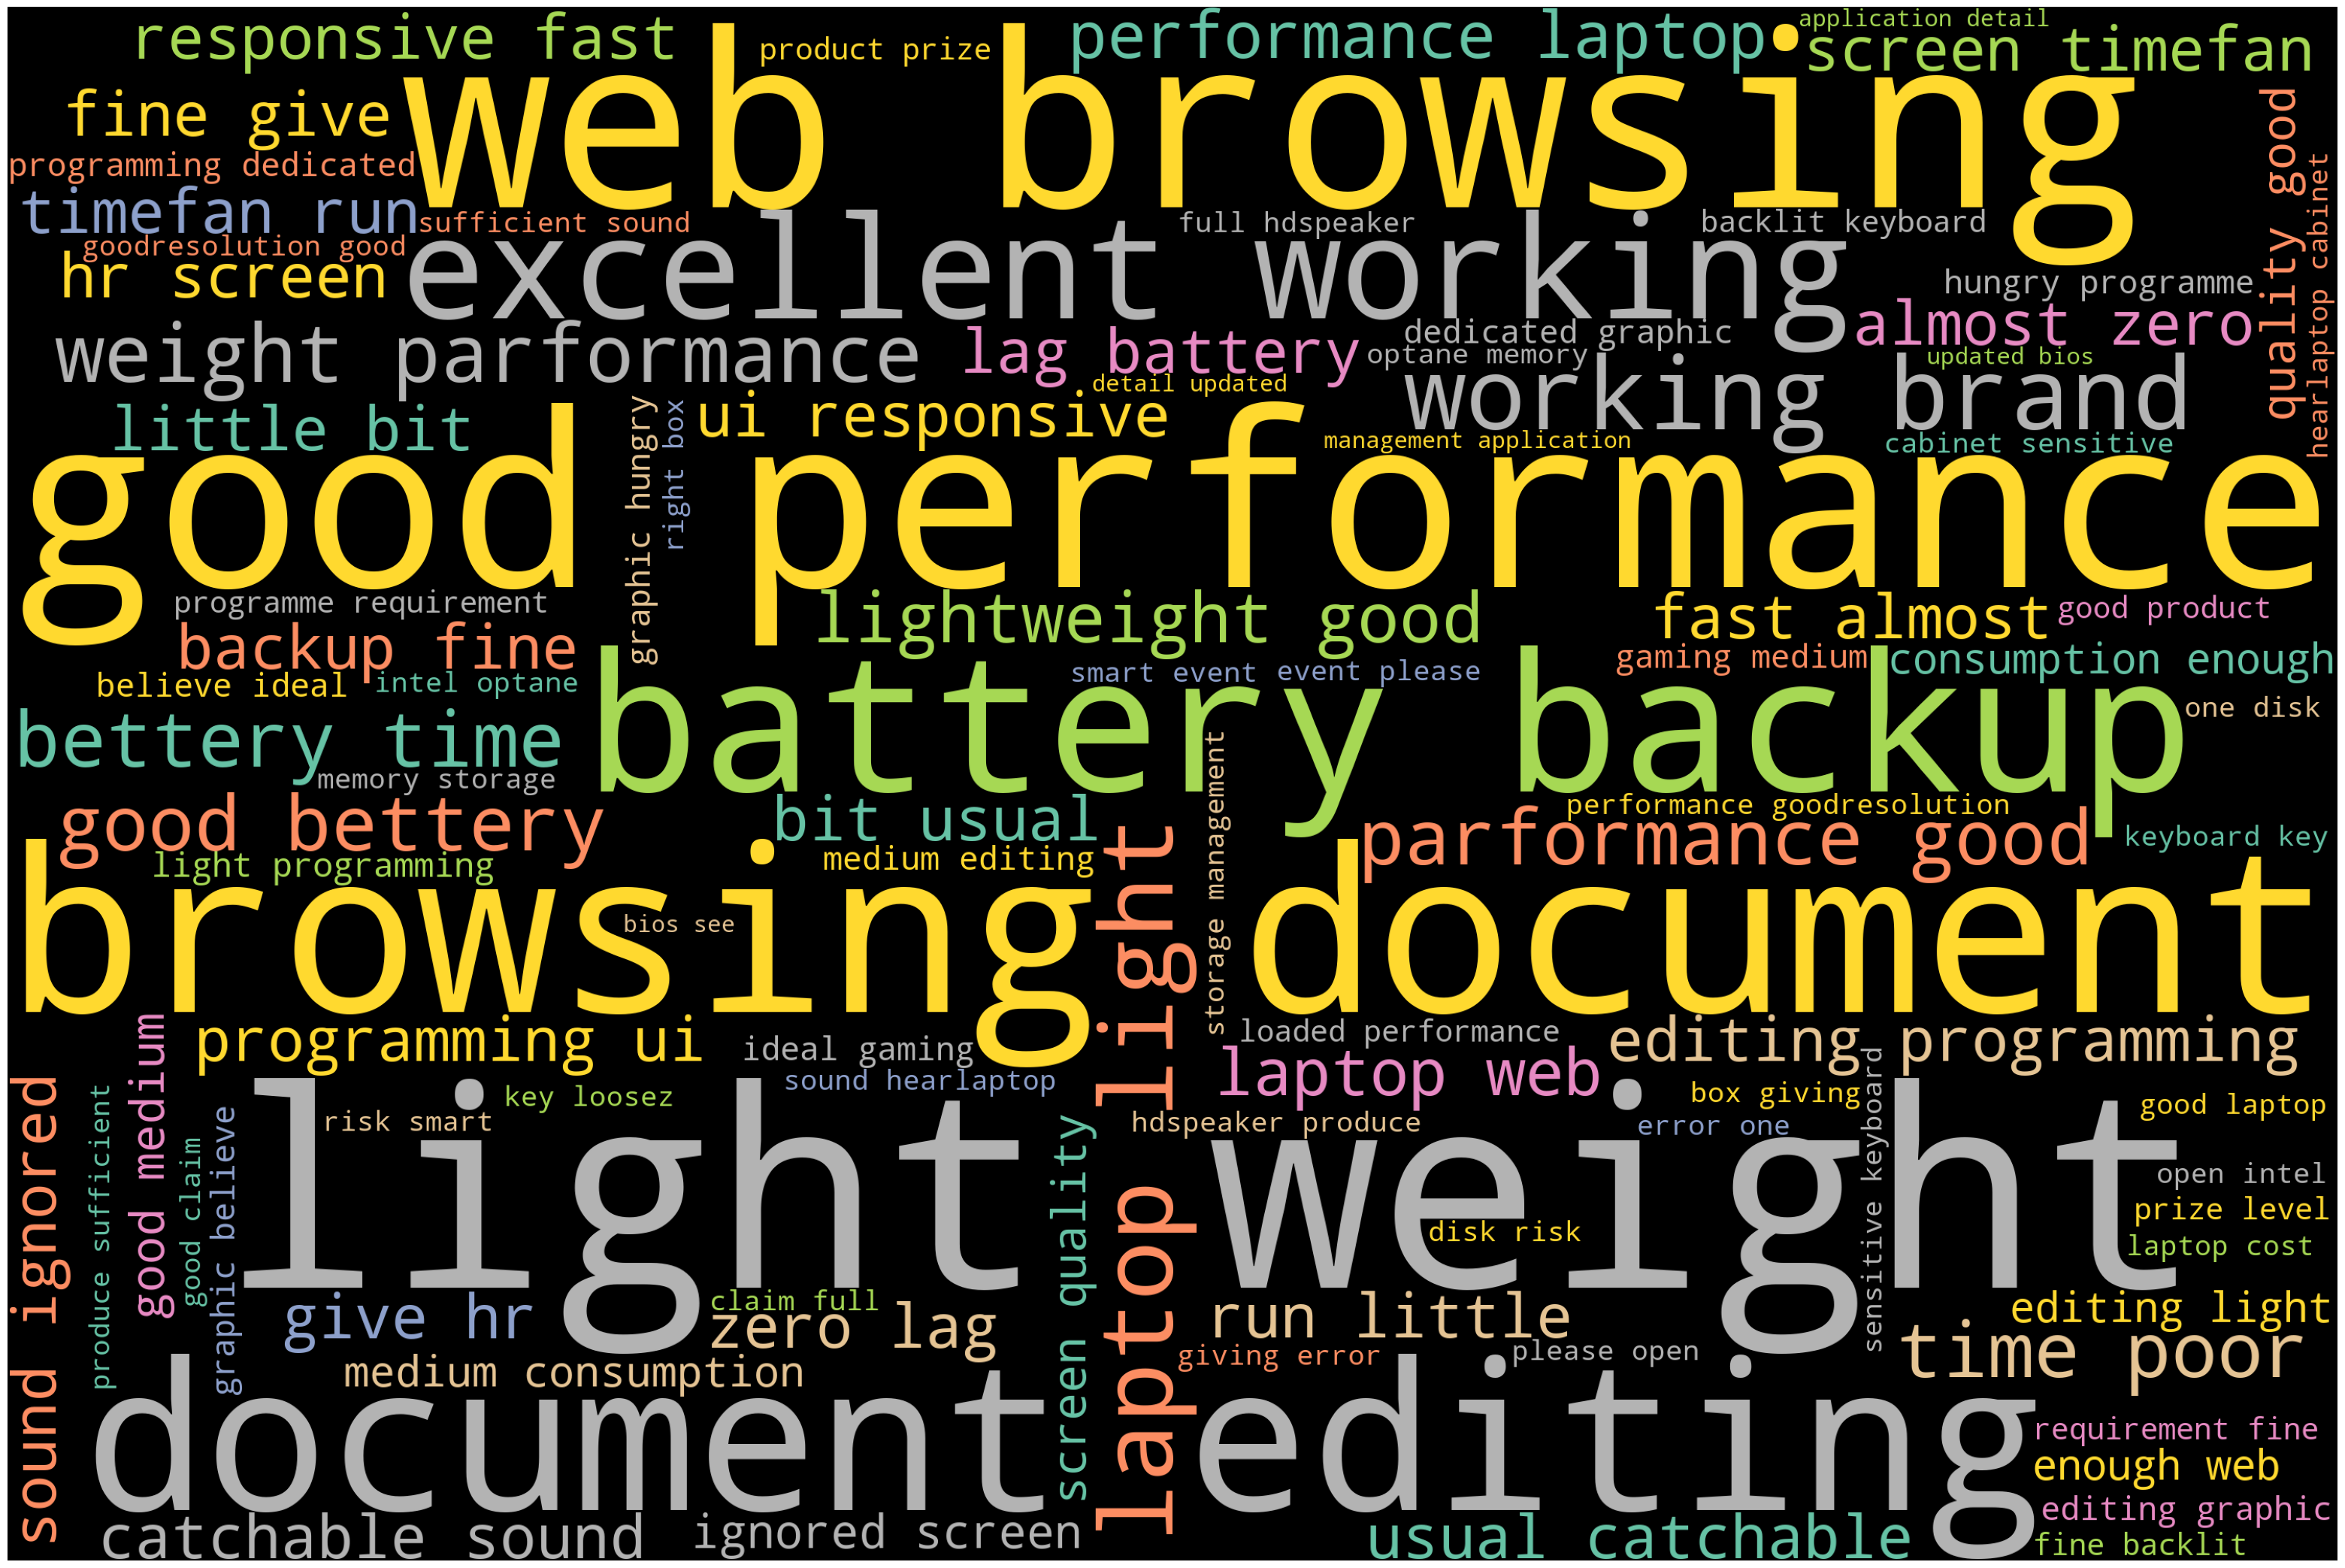

In [49]:
#Generating Wordcloud

wordcloud = WordCloud(width=3000, height=2000, background_color="black", max_words=100,
                     colormap='Set2').generate(lemma2)
plot_cloud(wordcloud)

# Named Entity Recognition

In [50]:
one_block = clean_reviews
one_block

doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [51]:
one_block

'excellent working brand excellent working brand laptop light weight parformance good bettery time poor lightweight good performance laptop web browsing document editing programming ui responsive fast almost zero lag battery backup fine gives 35 hrs screen timefan runs little bit usual catchable sound ignored screen quality good media consumption enough web browsing document editing light programming dedicated graphics believe ideal gaming media editing graphics hungry programmes requirement fine backlit keyboard good product prize level nan excellent working brand laptop light weight parformance good bettery time poor lightweight good performance laptop web browsing document editing programming ui responsive fast almost zero lag battery backup fine gives 35 hrs screen timefan runs little bit usual catchable sound ignored screen quality good media consumption enough web browsing document editing light programming dedicated graphics believe ideal gaming media editing graphics hungry pro

In [52]:
doc_block

excellent working brand excellent working brand laptop light weight parformance good bettery time poor lightweight good performance laptop web browsing document editing programming ui responsive fast almost zero lag battery backup fine gives 35 hrs screen timefan runs little bit usual catchable sound ignored screen quality good media consumption enough web browsing document editing light programming dedicated graphics believe ideal gaming media editing graphics hungry programmes requirement fine backlit keyboard good product prize level nan excellent working brand laptop light weight parformance good bettery time poor lightweight good performance laptop web browsing document editing programming ui responsive fast almost zero lag battery backup fine gives 35 hrs screen timefan runs little bit usual catchable sound ignored screen quality good media consumption enough web browsing document editing light programming dedicated graphics believe ideal gaming media editing graphics hungry prog

In [53]:
for token in doc_block:
    print(token, token.pos_)

excellent ADJ
working VERB
brand NOUN
excellent ADJ
working VERB
brand NOUN
laptop NOUN
light NOUN
weight NOUN
parformance NOUN
good ADJ
bettery PROPN
time NOUN
poor ADJ
lightweight ADJ
good ADJ
performance NOUN
laptop NOUN
web NOUN
browsing VERB
document NOUN
editing VERB
programming VERB
ui NOUN
responsive ADJ
fast ADJ
almost ADV
zero NUM
lag NOUN
battery NOUN
backup NOUN
fine NOUN
gives VERB
35 NUM
hrs NOUN
screen NOUN
timefan NOUN
runs VERB
little ADJ
bit NOUN
usual ADJ
catchable ADJ
sound NOUN
ignored VERB
screen NOUN
quality NOUN
good ADJ
media NOUN
consumption NOUN
enough ADJ
web NOUN
browsing VERB
document NOUN
editing VERB
light NOUN
programming NOUN
dedicated VERB
graphics NOUN
believe VERB
ideal ADJ
gaming NOUN
media NOUN
editing VERB
graphics NOUN
hungry ADJ
programmes NOUN
requirement NOUN
fine ADJ
backlit ADJ
keyboard NOUN
good ADJ
product NOUN
prize NOUN
level NOUN
nan PROPN
excellent ADJ
working VERB
brand NOUN
laptop NOUN
light NOUN
weight NOUN
parformance NOUN
good AD

media NOUN
could AUX
loaded VERB
overall ADJ
light ADJ
weight NOUN
good ADJ
performance NOUN
disappointing VERB
terms NOUN
build VERB
quality NOUN
feels VERB
like ADP
cheap ADJ
plastic NOUN
used VERB
good ADJ
laptop NOUN
cost NOUN
however ADV
right ADJ
box NOUN
giving VERB
error NOUN
one NUM
disks NOUN
risk VERB
smart ADJ
event NOUN
please INTJ
open VERB
intel NOUN
optane NOUN
memory NOUN
storage NOUN
management NOUN
application NOUN
details NOUN
updated VERB
bios NOUN
see VERB
gets VERB
fixed VERB
ask NOUN
replacement NOUN
still ADV
occurs VERB
nice ADJ
product NOUN
fantastic ADJ
product NOUN
thisthe NOUN
working NOUN
speed NOUN
good ADJ
graphics NOUN
tooits NOUN
speaker NOUN
also ADV
louderthe DET
best ADJ
thing NOUN
heating NOUN
battery NOUN
backup NOUN
really ADV
nicei NOUN
recommend VERB
buy NOUN
👍 PUNCT
media NOUN
could AUX
loaded VERB
overall ADJ
light ADJ
weight NOUN
good ADJ
performance NOUN
disappointing VERB
terms NOUN
build VERB
quality NOUN
feels VERB
like ADP
cheap ADJ
pl

sound NOUN
hearlaptop NOUN
cabinet PROPN
sensitive ADJ
keyboard NOUN
keys NOUN
loosez VERB
good ADJ
laptop NOUN
cost NOUN
however ADV
right ADJ
box NOUN
giving VERB
error NOUN
one NUM
disks NOUN
risk VERB
smart ADJ
event NOUN
please INTJ
open VERB
intel NOUN
optane NOUN
memory NOUN
storage NOUN
management NOUN
application NOUN
details NOUN
updated VERB
bios NOUN
see VERB
gets VERB
fixed VERB
ask NOUN
replacement NOUN
still ADV
occurs VERB
excellent ADJ
working VERB
brand NOUN
good ADJ
laptop NOUN
cost NOUN
however ADV
right ADJ
box NOUN
giving VERB
error NOUN
one NUM
disks NOUN
risk VERB
smart ADJ
event NOUN
please INTJ
open VERB
intel NOUN
optane NOUN
memory NOUN
storage NOUN
management NOUN
application NOUN
details NOUN
updated VERB
bios NOUN
see VERB
gets VERB
fixed VERB
ask NOUN
replacement NOUN
still ADV
occurs VERB
nice ADJ
product NOUN
fantastic ADJ
product NOUN
thisthe NOUN
working NOUN
speed NOUN
good ADJ
graphics NOUN
tooits NOUN
speaker NOUN
also ADV
louderthe DET
best ADJ
t

In [54]:
#filtering noun and verbs only
noun_verbs= [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(noun_verbs)

['working', 'brand', 'working', 'brand', 'laptop', 'light', 'weight', 'parformance', 'time', 'performance', 'laptop', 'web', 'browsing', 'document', 'editing', 'programming', 'ui', 'lag', 'battery', 'backup', 'fine', 'gives', 'hrs', 'screen', 'timefan', 'runs', 'bit', 'sound', 'ignored', 'screen', 'quality', 'media', 'consumption', 'web', 'browsing', 'document', 'editing', 'light', 'programming', 'dedicated', 'graphics', 'believe', 'gaming', 'media', 'editing', 'graphics', 'programmes', 'requirement', 'keyboard', 'product', 'prize', 'level', 'working', 'brand', 'laptop', 'light', 'weight', 'parformance', 'time', 'performance', 'laptop', 'web', 'browsing', 'document', 'editing', 'programming', 'ui', 'lag', 'battery', 'backup', 'fine', 'gives', 'hrs', 'screen', 'timefan', 'runs', 'bit', 'sound', 'ignored', 'screen', 'quality', 'media', 'consumption', 'web', 'browsing', 'document', 'editing', 'light', 'programming', 'dedicated', 'graphics', 'believe', 'gaming', 'media', 'editing', 'graphi

In [55]:
cv = CountVectorizer()

X = cv.fit_transform(noun_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x:x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word','count']

wf_df[0:10]

word  count
0        media    479
1       laptop    360
2  performance    360
3      editing    360
4     graphics    360
5      product    360
6      working    240
7       weight    240
8          web    240
9     browsing    240

In [56]:
print(X)

  (0, 84)	1
  (1, 9)	1
  (2, 84)	1
  (3, 9)	1
  (4, 41)	1
  (5, 43)	1
  (6, 83)	1
  (7, 53)	1
  (8, 76)	1
  (9, 54)	1
  (10, 41)	1
  (11, 82)	1
  (12, 10)	1
  (13, 20)	1
  (14, 21)	1
  (15, 60)	1
  (16, 79)	1
  (17, 40)	1
  (18, 3)	1
  (19, 2)	1
  (20, 25)	1
  (21, 29)	1
  (22, 35)	1
  (23, 67)	1
  (24, 77)	1
  :	:
  (13242, 58)	1
  (13243, 75)	1
  (13244, 84)	1
  (13245, 71)	1
  (13246, 32)	1
  (13247, 78)	1
  (13248, 70)	1
  (13249, 74)	1
  (13250, 34)	1
  (13251, 3)	1
  (13252, 2)	1
  (13253, 49)	1
  (13254, 62)	1
  (13255, 12)	1
  (13256, 47)	1
  (13257, 44)	1
  (13258, 83)	1
  (13259, 54)	1
  (13260, 18)	1
  (13261, 73)	1
  (13262, 11)	1
  (13263, 61)	1
  (13264, 24)	1
  (13265, 55)	1
  (13266, 81)	1


In [57]:
print(sum_words)

[[120 120 240 240 120   1 120 120 120 120 240 120 120 120 120 120 120 120
  120 120 240 360 120 120 120 120 120 120 120 120 120 120 360 120 120 120
  120 120 240 120 120 360 120 188 240 119 120 479 120 120 120 120 120 120
  360 120 120 120 360 120 240 240 120 120 120 120 120 240 120 240 120 120
  120 120 120 120 120 120 120 120 120 120 240 240 240]]


In [58]:
print(words_freq)

[('media', 479), ('laptop', 360), ('performance', 360), ('editing', 360), ('graphics', 360), ('product', 360), ('working', 240), ('weight', 240), ('web', 240), ('browsing', 240), ('document', 240), ('programming', 240), ('battery', 240), ('backup', 240), ('screen', 240), ('sound', 240), ('quality', 240), ('keyboard', 240), ('loaded', 240), ('light', 188), ('brand', 120), ('parformance', 120), ('time', 120), ('ui', 120), ('lag', 120), ('fine', 120), ('gives', 120), ('hrs', 120), ('timefan', 120), ('runs', 120), ('bit', 120), ('ignored', 120), ('consumption', 120), ('dedicated', 120), ('believe', 120), ('gaming', 120), ('programmes', 120), ('requirement', 120), ('prize', 120), ('level', 120), ('goodresolution', 120), ('claim', 120), ('produce', 120), ('hearlaptop', 120), ('keys', 120), ('cost', 120), ('box', 120), ('giving', 120), ('error', 120), ('disks', 120), ('risk', 120), ('event', 120), ('open', 120), ('intel', 120), ('optane', 120), ('memory', 120), ('storage', 120), ('management'

In [59]:
print(wf_df)

           word  count
0         media    479
1        laptop    360
2   performance    360
3       editing    360
4      graphics    360
..          ...    ...
80        feels    120
81      plastic    120
82         used    120
83       loosez    119
84      bettery      1

[85 rows x 2 columns]


<AxesSubplot:title={'center':'Top 10 Noun and Verbs'}, xlabel='word'>

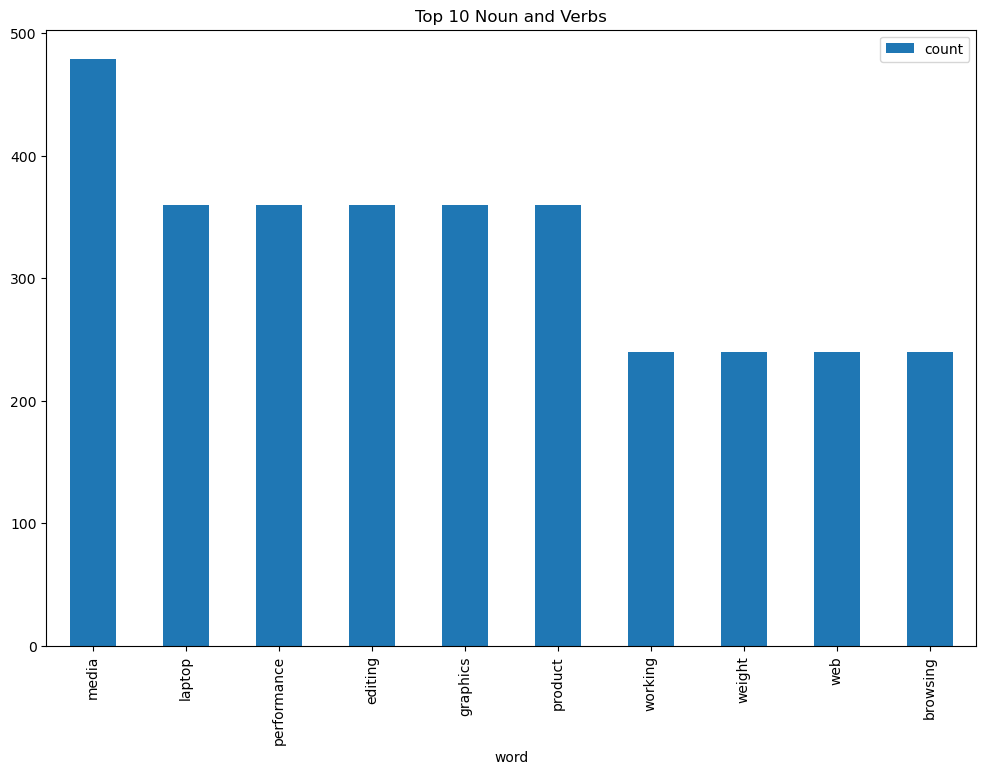

In [60]:
#Visualizing top 10 wods by barchart

wf_df[0:10].plot.bar(x='word', figsize=(12,8), title= "Top 10 Noun and Verbs")

# Emotion Mining / Sentiment Analysis

In [61]:
reviews

['Excellent Working this brand',
 'Excellent Working this brand',
 'Laptop is light weight and parformance is good. But bettery time is poor.',
 "This is a light-weight, good performance laptop for web browsing, document editing, and programming. UI is responsive and fast with almost zero lag. Battery backup is fine as it gives more than 3.5 hrs of screen on time.Fan runs Little bit more than usual with catchable sound, but that can be ignored. Screen quality is not that good for media consumption but is enough for web browsing, document editing, and light programming. There is no dedicated graphics so I believe it's not ideal for gaming, media editing or other graphics hungry programmes (That is not my requirement so it's fine for me). There is NO Backlit keyboard.",
 'Good product on this prize level',
 'nan',
 'Excellent Working this brand',
 'Laptop is light weight and parformance is good. But bettery time is poor.',
 "This is a light-weight, good performance laptop for web browsin

In [62]:
from nltk import tokenize
scentences = tokenize.sent_tokenize(" ".join(reviews))
scentences

['Excellent Working this brand Excellent Working this brand Laptop is light weight and parformance is good.',
 'But bettery time is poor.',
 'This is a light-weight, good performance laptop for web browsing, document editing, and programming.',
 'UI is responsive and fast with almost zero lag.',
 'Battery backup is fine as it gives more than 3.5 hrs of screen on time.Fan runs Little bit more than usual with catchable sound, but that can be ignored.',
 'Screen quality is not that good for media consumption but is enough for web browsing, document editing, and light programming.',
 "There is no dedicated graphics so I believe it's not ideal for gaming, media editing or other graphics hungry programmes (That is not my requirement so it's fine for me).",
 'There is NO Backlit keyboard.',
 'Good product on this prize level nan Excellent Working this brand Laptop is light weight and parformance is good.',
 'But bettery time is poor.',
 'This is a light-weight, good performance laptop for web

In [63]:
sent_df = pd.DataFrame(scentences, columns=['sentences'])
sent_df

sentences
0     Excellent Working this brand Excellent Working...
1                             But bettery time is poor.
2     This is a light-weight, good performance lapto...
3       UI is responsive and fast with almost zero lag.
4     Battery backup is fine as it gives more than 3...
...                                                 ...
2035         Have updated BIOS to see if it gets fixed.
2036       Will ask for replacement if it still occurs.
2037  Nice product A Fantastic Product is this.....T...
2038  Overall light weight, good in performance but ...
2039       It feels like cheap plastic being used here.

[2040 rows x 1 columns]

In [64]:
afinn = pd.read_csv("Afinn.csv", encoding="latin-1")
afinn

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [65]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [66]:
#Custom function: score each word in a sentence in lemmatized form, but calculate the score of the whole original sentence.

sentiment_lexion = affinity_scores

def calculate_sentiment(text: str=None):
    sent_score=0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexion.get(word.lemma_,0)
        return sent_score

In [67]:
#manual testing
calculate_sentiment("Awesome")

4

In [68]:
#applying it on reviews
sent_df['Sentiment_value'] = sent_df['sentences'].apply(calculate_sentiment)

In [69]:
sent_df

sentences  Sentiment_value
0     Excellent Working this brand Excellent Working...                3
1                             But bettery time is poor.               -2
2     This is a light-weight, good performance lapto...                3
3       UI is responsive and fast with almost zero lag.                1
4     Battery backup is fine as it gives more than 3...                1
...                                                 ...              ...
2035         Have updated BIOS to see if it gets fixed.                0
2036       Will ask for replacement if it still occurs.                0
2037  Nice product A Fantastic Product is this.....T...               14
2038  Overall light weight, good in performance but ...                1
2039       It feels like cheap plastic being used here.                2

[2040 rows x 2 columns]

In [70]:
sent_df[sent_df.Sentiment_value < -5]

Empty DataFrame
Columns: [sentences, Sentiment_value]
Index: []

In [71]:
sent_df[sent_df.Sentiment_value < -3]

sentences  Sentiment_value
19    However, right out of the box, it is giving me...               -4
35    However, right out of the box, it is giving me...               -4
69    However, right out of the box, it is giving me...               -4
92    However, right out of the box, it is giving me...               -4
101   However, right out of the box, it is giving me...               -4
...                                                 ...              ...
1974  However, right out of the box, it is giving me...               -4
1979  However, right out of the box, it is giving me...               -4
1996  However, right out of the box, it is giving me...               -4
2013  However, right out of the box, it is giving me...               -4
2033  However, right out of the box, it is giving me...               -4

[120 rows x 2 columns]

In [72]:
sent_df[sent_df.Sentiment_value == -3]

Empty DataFrame
Columns: [sentences, Sentiment_value]
Index: []

In [73]:
sent_df[sent_df.Sentiment_value > 5]

sentences  Sentiment_value
8     Good product on this prize level nan Excellent...                6
18    Performance is goodResolution is not good as t...                6
23    Nice product A Fantastic Product is this.....T...               14
39    Nice product A Fantastic Product is this.....T...               14
51    Performance is goodResolution is not good as t...                6
...                                                 ...              ...
1995  Performance is goodResolution is not good as t...                6
2009  Performance is goodResolution is not good as t...               18
2012  Nice product A Fantastic Product is this.....T...               17
2017  Nice product A Fantastic Product is this.....T...               17
2037  Nice product A Fantastic Product is this.....T...               14

[255 rows x 2 columns]

In [74]:
sent_df[sent_df.Sentiment_value > 10]

sentences  Sentiment_value
23    Nice product A Fantastic Product is this.....T...               14
39    Nice product A Fantastic Product is this.....T...               14
96    Nice product A Fantastic Product is this.....T...               14
111   Nice product A Fantastic Product is this.....T...               17
116   Nice product A Fantastic Product is this.....T...               14
...                                                 ...              ...
1983  Nice product A Fantastic Product is this.....T...               14
2009  Performance is goodResolution is not good as t...               18
2012  Nice product A Fantastic Product is this.....T...               17
2017  Nice product A Fantastic Product is this.....T...               17
2037  Nice product A Fantastic Product is this.....T...               14

[117 rows x 2 columns]

In [75]:
#how many words are there in one sentence
sent_df['word_count'] = sent_df['sentences'].str.split().apply(len)
sent_df.head(10)

sentences  Sentiment_value  \
0  Excellent Working this brand Excellent Working...                3   
1                          But bettery time is poor.               -2   
2  This is a light-weight, good performance lapto...                3   
3    UI is responsive and fast with almost zero lag.                1   
4  Battery backup is fine as it gives more than 3...                1   
5  Screen quality is not that good for media cons...                3   
6  There is no dedicated graphics so I believe it...                3   
7                      There is NO Backlit keyboard.               -1   
8  Good product on this prize level nan Excellent...                6   
9                          But bettery time is poor.               -2   

   word_count  
0          16  
1           5  
2          14  
3           9  
4          29  
5          20  
6          30  
7           5  
8          19  
9           5

In [76]:
sent_df.tail(10)

sentences  Sentiment_value  \
2030  Overall light weight, good in performance but ...                1   
2031       It feels like cheap plastic being used here.                2   
2032               Over all a good laptop at this cost.                3   
2033  However, right out of the box, it is giving me...               -4   
2034  Please open Intel Optane Memory and Storage Ma...                1   
2035         Have updated BIOS to see if it gets fixed.                0   
2036       Will ask for replacement if it still occurs.                0   
2037  Nice product A Fantastic Product is this.....T...               14   
2038  Overall light weight, good in performance but ...                1   
2039       It feels like cheap plastic being used here.                2   

      word_count  
2030          13  
2031           8  
2032           8  
2033          21  
2034          11  
2035           9  
2036           8  
2037          49  
2038          13  
2039           8

In [77]:
#Sentiment score of the reviews as a whole
sent_df['Sentiment_value'].describe()

count    2040.000000
mean        2.001961
std         3.922870
min        -4.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        28.000000
Name: Sentiment_value, dtype: float64

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sentiment_value', ylabel='Density'>

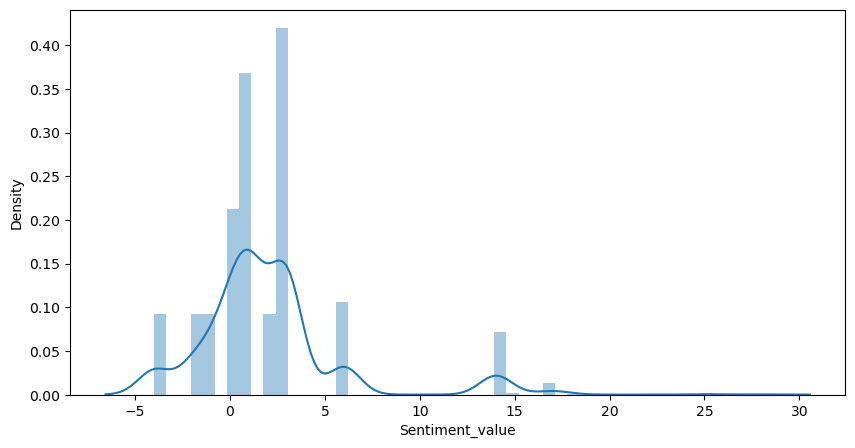

In [78]:
#Visulaizing
plt.figure(figsize=(10,5))
sns.distplot(sent_df['Sentiment_value'])

In [79]:
#reseting indexes
sent_df['index']=range(0,len(sent_df))
sent_df

sentences  Sentiment_value  \
0     Excellent Working this brand Excellent Working...                3   
1                             But bettery time is poor.               -2   
2     This is a light-weight, good performance lapto...                3   
3       UI is responsive and fast with almost zero lag.                1   
4     Battery backup is fine as it gives more than 3...                1   
...                                                 ...              ...   
2035         Have updated BIOS to see if it gets fixed.                0   
2036       Will ask for replacement if it still occurs.                0   
2037  Nice product A Fantastic Product is this.....T...               14   
2038  Overall light weight, good in performance but ...                1   
2039       It feels like cheap plastic being used here.                2   

      word_count  index  
0             16      0  
1              5      1  
2             14      2  
3              9      3  
4             29      4  
...          ...    ...  
2035           9   2035  
2036           8   2036  
2037          49   2037  
2038          13   2038  
2039           8   2039  

[2040 rows x 4 columns]

<AxesSubplot:xlabel='index', ylabel='Sentiment_value'>

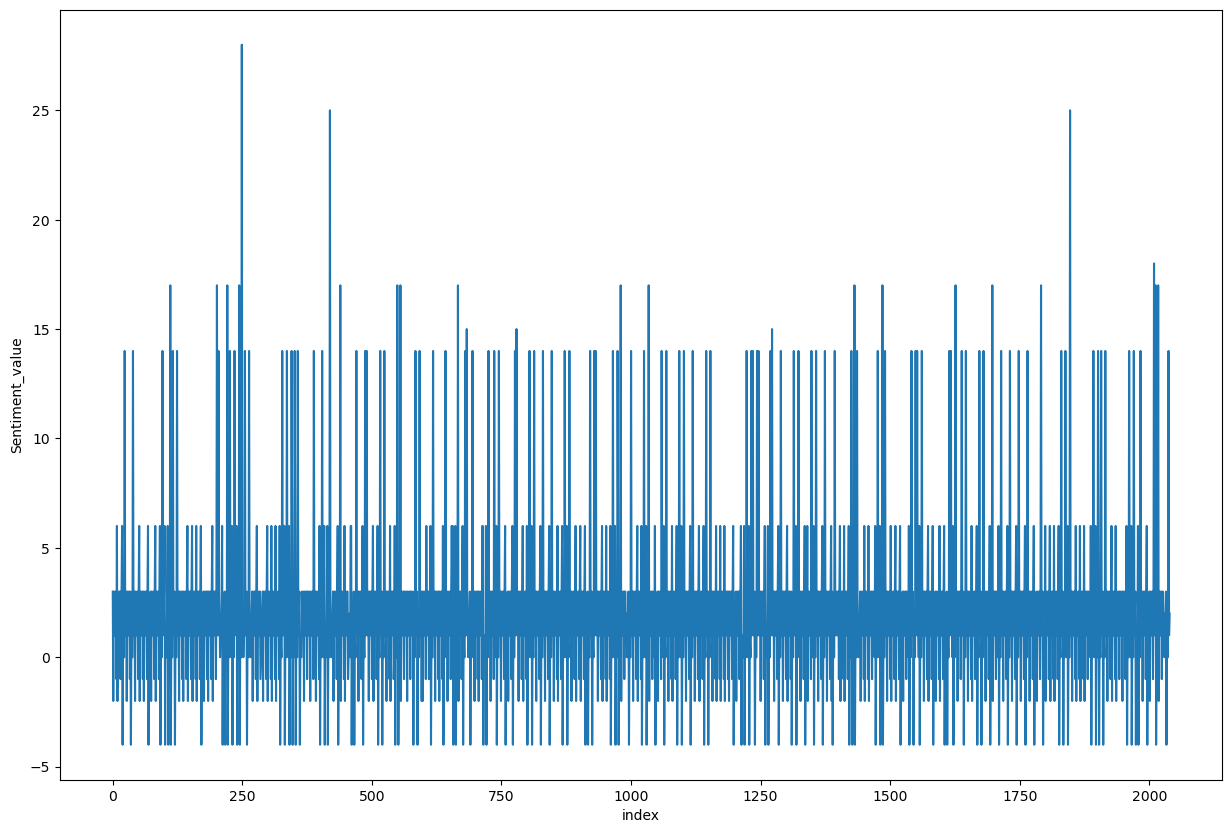

In [80]:
plt.figure(figsize=(15,10))
sns.lineplot(x='index', y='Sentiment_value', data=sent_df)

<AxesSubplot:title={'center':'Sentiment Values to Word Count'}, xlabel='word_count', ylabel='Sentiment_value'>

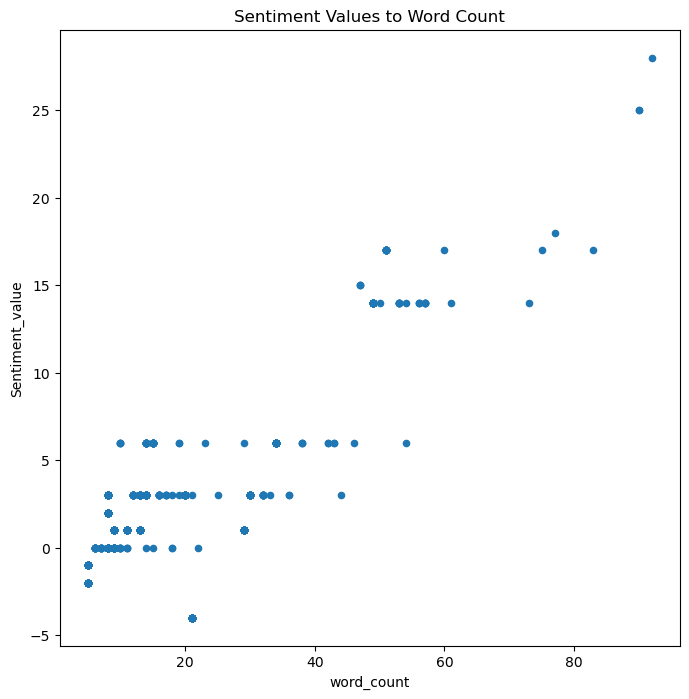

In [81]:
sent_df.plot.scatter(x='word_count', y='Sentiment_value', figsize=(8,8), title="Sentiment Values to Word Count")

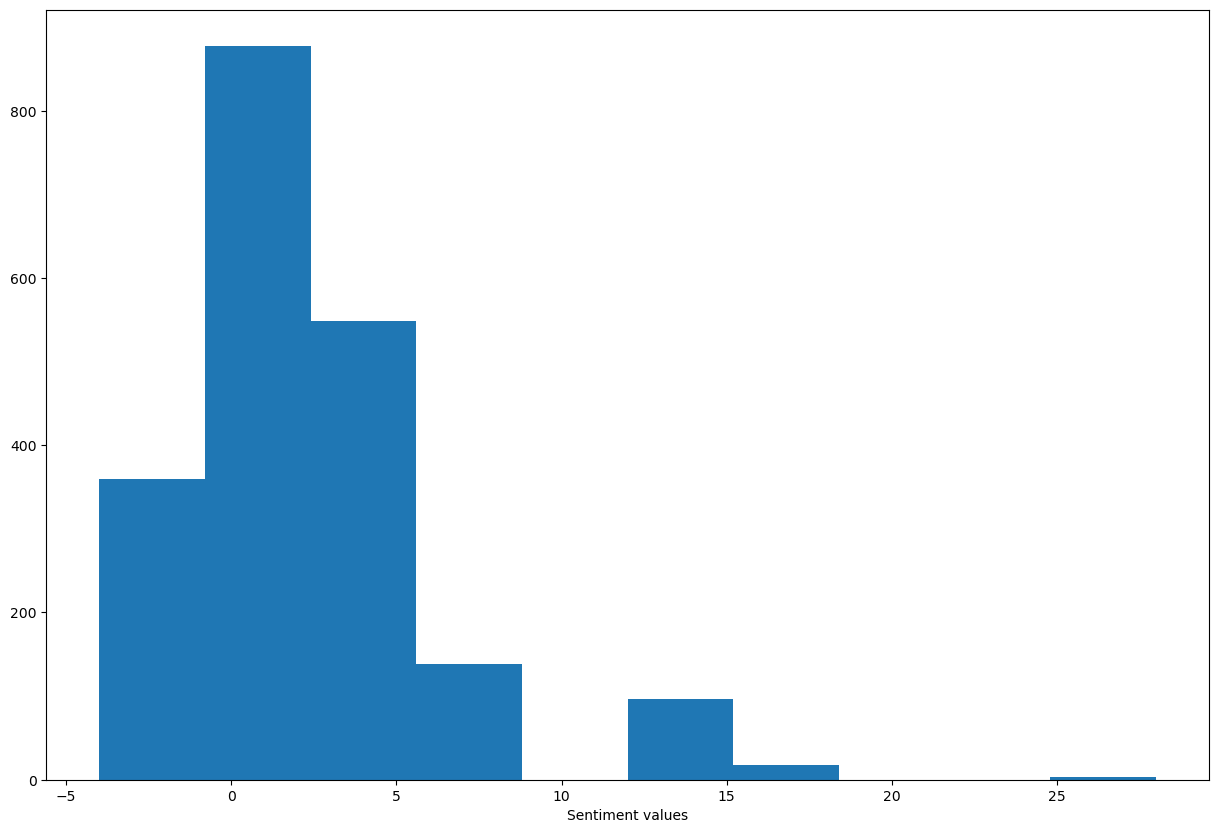

In [87]:
#histogram of sentiment values

plt.figure(figsize=(15,10))
plt.hist(x="Sentiment_value", data=sent_df)
plt.xlabel("Sentiment values")
plt.show()